In [1]:
from model2 import *
from data import *
import cv2

Using TensorFlow backend.


In [ ]:
#import tensorflow as tf
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#print(physical_devices)
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
model_checkpoint = ModelCheckpoint('unetmod_weights100.hdf5', monitor='loss',verbose=1, save_best_only=True)
model = unet(pretrained_weights = 'unetmod_weights100.hdf5')

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 128 73856       max_pooling2d_1[0][0]            
____________________________________________________________________________________________

## Train dengan npy file

In [3]:
#imgs_train = np.load("./data/image_arr.npy")
#imgs_mask_train = np.load("./data/mask_arr.npy")
imgs_train, imgs_mask_train = geneTrainNpy('./data/train/aug/','./data/train/aug/')
unettraining = model.fit(imgs_train, imgs_mask_train, batch_size = 2, epochs = 100, verbose = 1, validation_split= 10/1200, shuffle = True, callbacks = [model_checkpoint])

78ms/step - loss: 0.0038 - accuracy: 0.9985 - val_loss: 0.0037 - val_accuracy: 0.9990

Epoch 00009: loss improved from 0.00423 to 0.00376, saving model to unetmod_weights100.hdf5
Epoch 10/100
1190/1190 [==============================] - 331s 278ms/step - loss: 0.0030 - accuracy: 0.9988 - val_loss: 0.0031 - val_accuracy: 0.9990

Epoch 00010: loss improved from 0.00376 to 0.00297, saving model to unetmod_weights100.hdf5
Epoch 11/100
1190/1190 [==============================] - 332s 279ms/step - loss: 0.0037 - accuracy: 0.9986 - val_loss: 0.0034 - val_accuracy: 0.9990

Epoch 00011: loss did not improve from 0.00297
Epoch 12/100
1190/1190 [==============================] - 332s 279ms/step - loss: 0.0041 - accuracy: 0.9985 - val_loss: 0.0039 - val_accuracy: 0.9988

Epoch 00012: loss did not improve from 0.00297
Epoch 13/100
1190/1190 [==============================] - 331s 278ms/step - loss: 0.0031 - accuracy: 0.9987 - val_loss: 0.0033 - val_accuracy: 0.9987

Epoch 00013: loss did not impro

In [ ]:
start : 15:34:40

## History Plot After Training

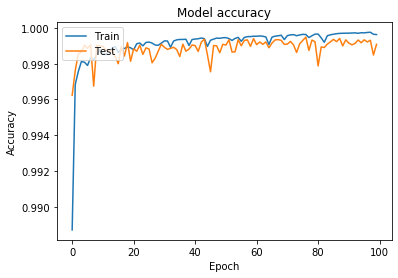

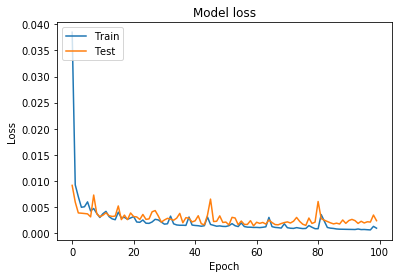

In [4]:
import matplotlib.pyplot as plt 

# Plot training & validation accuracy values
plt.plot(unettraining.history['accuracy'])
plt.plot(unettraining.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(unettraining.history['loss'])
plt.plot(unettraining.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Writing Training History to Txt

In [5]:
acc = open("acc.txt", "w+")
acc.write(str(unettraining.history['accuracy']))
acc.close()
val_acc = open("val_acc.txt", "w+")
val_acc.write(str(unettraining.history['val_accuracy']))
val_acc.close()
loss = open("loss.txt", "w+")
loss.write(str(unettraining.history['loss']))
loss.close()
val_loss =open("val_loss.txt", "w+")
val_loss.write(str(unettraining.history['val_loss']))
val_loss.close()

## Read Training History from Txt

In [6]:
def convert2list(file):
    file_list = file.read()
    file_c = file_list[1:-1]
    file_c = list(file_c.split(','))
    for i in range(0, len(file_c)): 
        file_c[i] = float(file_c[i])
    return file_c

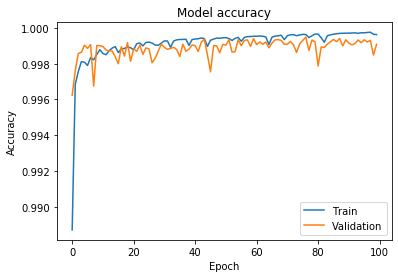

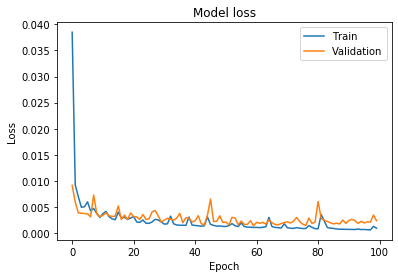

In [7]:
acc = convert2list(open("./experiment/unetmod-100epoch/acc-unetmod-100epoch.txt", "r"))
val_acc = convert2list(open("./experiment/unetmod-100epoch/val_acc-unetmod-100epoch.txt", "r"))
loss = convert2list(open("./experiment/unetmod-100epoch/loss-unetmod-100epoch.txt", "r"))
val_loss = convert2list(open("./experiment/unetmod-100epoch/val_loss-unetmod-100epoch.txt", "r"))

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Simpan Data Prediksi

In [8]:
def saveResult(save_path, npyfile, flag_multi_class = False, num_class = 1):
    for i, item in enumerate(npyfile):
        img = labelVisualize(num_class, COLOR_DICT, item) if flag_multi_class else item[:,:,0]
        print(img.shape)
        img = trans.resize(img, (432,532)) # Gambar USG TA
        #img = trans.resize(img, (512,470)) # Gambar USG Phantom
        io.imsave(os.path.join(save_path,"%d_predict.png"%i), img, check_contrast=False)

In [9]:
#testGene = testGenerator('data/test') #Data GE
testGene = testGenerator('data/test') #Data Phantom
results = model.predict_generator(testGene,238,verbose=1, callbacks = [model_checkpoint])#cv2.normalize(src= model.predict_generator(testGene,237,verbose=1, callbacks = [model_checkpoint]), dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
#saveResult('data/test', results) #Data GE
saveResult('data/test', results) #Data Phantom

m float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
(256, 256)
(256, 256)
W0724 01:03:20.994653 19376 util.py:42] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0724 01:03:21.024574 19376 util.py:42] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0724 01:03:21.056514 19376 util.py:42] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0724 01:03:21.103363 19376 util.py:42] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
(256, 256)
(256, 256)
(256, 256)
W0724 01:03:21.136785 19376 util.py:42] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
(256, 256)
W0724 01:03:21.167667 19376 util.py:42] 